<CENTER>
</br>
<p><font size="5">  SAGAR Hedi   </font></p>
<p><font size="5"> Study of Clustering Techniques </font></p>
</p>
</CENTER>

In [1]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

# Clustering functions from Scikit.learn
from sklearn.cluster import KMeans
from sklearn.cluster import dbscan

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to load the IRIS dataset
from sklearn.datasets import load_iris

## 1) Ruspini dataset

In [3]:
# Load the data: ruspini
ruspini = pd.read_csv("ruspini.csv",sep=",")
#print(ruspini)
ruspini.describe() # Statistical summary of the data

,Unnamed: 0,x,y
count,75.000000,75.00000,75.000000
mean,38.000000,54.88000,92.026667
std,21.794495,30.50253,48.702620
min,1.000000,4.00000,4.000000
25%,19.500000,31.50000,56.500000
50%,38.000000,52.00000,96.000000
75%,56.500000,76.50000,141.500000
max,75.000000,117.00000,156.000000


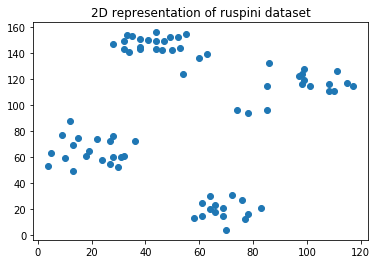

In [6]:
# Plot Ruspini dataset
plt.title('2D representation of ruspini dataset')
plt.scatter(ruspini['x'],ruspini['y'])

__Comments__:  We visually observe some clusters. We expect a clustering algorithm to find at least 4 clusters. The clusters look isotropic and convex, with similar variance. The K-means algorithm may be able to identify these clusters. 

## 2) K-means algorithm

In [ ]:
def Kmeans(data, nb_clusters):
    
    # Stopping criterion for the algorithm
    stop_crit = 1e-7
    
    # Select some initial centroïds
    pos = rnd.sample(range(np.shape(data)[0]),nb_clusters)
    centers = data[pos,:]
    
    # Initialize the algorithm
    distances = np.zeros((data.shape[0], centers.shape[0]))
    error = 10
    # Run the algorithm
    while error > stop_crit:
        # Finds the data in each cluster
        for i in range(nb_clusters):
            distances[:,i] = np.linalg.norm(data-centers[i], axis=1)
        clusters = np.argmin(distances, axis=1)
        centers_old = centers.copy()
        
        # Estimates the centroids
        for i in range(nb_clusters):
            centers[i] = np.mean(data[clusters == i], axis=0)
        error = np.linalg.norm(centers - centers_old)  
        
    return centers, clusters

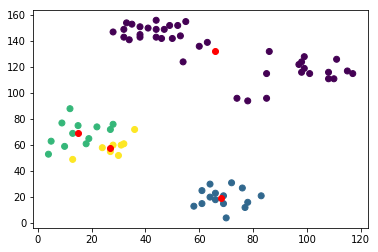

In [101]:
# Run K-means onto the Ruspini dataset
data = np.array(ruspini)[:,[1,2]]
centers,clusters = Kmeans(data,4)

# plot the results
plt.scatter(ruspini['x'], ruspini['y'],c=clusters)
plt.scatter(centers[:,0],centers[:,1],c="red")

__Comment__: Since I didn't set a proper initialization, the K-means method is unstable. Sometimes it retrieves the correct clusters, and sometimes not.

[[ 10.5         20.15        64.95      ]
 [ 52.          98.17647059 114.88235294]
 [ 68.          68.93333333  19.4       ]
 [ 32.          43.91304348 146.04347826]]


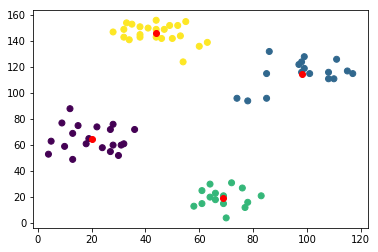

In [110]:
# I run a K-means algorithm onto the ruspini dataset, and display the centers
#kmeans = KMeans(n_clusters=4,n_init=40,init='random').fit(ruspini) # Random initialization with repeats
kmeans = KMeans(n_clusters=4,n_init=1,init='k-means++').fit(ruspini) # Initializations with K-means++, no repeat
centers=kmeans.cluster_centers_
print(centers)

# I also represent the data in 2D-space with colors corresponding to cluster
kmeans.labels_
plt.scatter(ruspini['x'], ruspini['y'],c=kmeans.labels_)
plt.scatter(centers[:,1],centers[:,2],c="red")

__Comment:__ With a proper initialization, the K-means method is stable. 

In [112]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(ruspini) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(ruspini, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.5393208837562198
For n = 3 Silhouette_score: 0.6570531855325802
For n = 4 Silhouette_score: 0.7459402473705687
For n = 5 Silhouette_score: 0.7027786230562486
For n = 6 Silhouette_score: 0.6186953517303782
For n = 7 Silhouette_score: 0.5135079610128102
For n = 8 Silhouette_score: 0.5002152576346411
For n = 9 Silhouette_score: 0.5104622097119623
For n = 10 Silhouette_score: 0.5154542738676772


__Comment__: If I choose the value of K that maximizes the Silhouette, I get K=4

## 3) DBSCAN

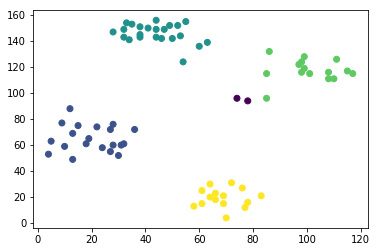

In [140]:
# Apply DB-SCAN
cores_samples,labels = dbscan(data,eps=20,min_samples=5)

# Plot the results
plt.scatter(ruspini['x'], ruspini['y'],c=labels)

__Comments__: We see that the parameters epsilon and min_samples should be chosen very carefully. We also observe that some data do not belong to any cluster.

## 4) IRIS Dataset

In [15]:
# Load IRIS
data = load_iris()
X = data.data # Features
Y = data.target # Labels

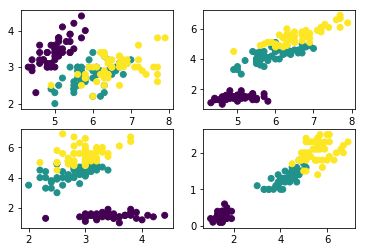

In [26]:
# Plot some dimensions of IRIS, color with the labels
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.subplot(2,2,2)
plt.scatter(X[:,0],X[:,2],c=Y)
plt.subplot(2,2,3)
plt.scatter(X[:,1],X[:,2],c=Y)
plt.subplot(2,2,4)
plt.scatter(X[:,2],X[:,3],c=Y)

__Comment__: IRIS has three classes. Plotting different dimensions shows that it may be difficult for K-means to distinguish between classes. 

In [29]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(X) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(X, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.681046169211746
For n = 3 Silhouette_score: 0.5528190123564091
For n = 4 Silhouette_score: 0.49745518901737446
For n = 5 Silhouette_score: 0.4887488870931048
For n = 6 Silhouette_score: 0.3664804028900824
For n = 7 Silhouette_score: 0.34345774571423426
For n = 8 Silhouette_score: 0.34517578031324164
For n = 9 Silhouette_score: 0.3212170941977906
For n = 10 Silhouette_score: 0.3404566408600013


__Comment__: K=2 clusters has the best Silhouette, but there are three classes...